In [46]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen
from konlpy.tag import Kkma, Komoran, Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform
import nltk
import re

In [26]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [23]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# 한글 글꼴
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')

else:
    plt.rc('font', family = 'AppleGothic')

In [16]:
lyrics_list = []
name_list = []
title_list = []
category_list = []

for n in range(0,10):
    headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
    data = requests.get('https://www.genie.co.kr/chart/musicHistory?year=200{}&category=0'.format(n) ,headers=headers)
    bs = BeautifulSoup(data.text, 'html.parser')
    
    bs1 = bs.find('tbody')
    codeNum_list = []
    for i in range(0,50):
        codeNum_list.append(bs1.find_all('tr')[i].attrs['songid'])
        
    url = 'https://www.genie.co.kr/detail/songInfo?xgnm='

    
    for codeNum in codeNum_list:
    
        headers1 = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}
        data1 = requests.get(url+codeNum,headers=headers)
        info_bs = BeautifulSoup(data1.text, 'html.parser')
        
        lyrics_list.append(info_bs.find('pre').find('p').text.replace('\r','').replace('\t','').replace('\n\n','\n').replace('\n',' '))
        name_list.append(info_bs.find_all('span', {'class':'value'})[0].text)
        category_list.append(info_bs.find_all('span', {'class':'value'})[2].text)
        title_list.append(info_bs.find('pre',{'id':'pLyrics'}).find('div').text.split('-')[0])

In [4]:
data = {'가수명':name_list, '제목':title_list, '장르':category_list, '가사':lyrics_list}

In [5]:
df = pd.DataFrame(data)
df

,가수명,제목,장르,가사
0,조성모,아시나요,가요 / 발라드,아시나요 얼마나 사랑했는지 그댈 보면 자꾸 눈물이 나서 차마 그대 바라 보지 못하...
1,지오디 (god),거짓말,가요 / 발라드,미안해 난 니가 싫어 졌어 우리 이만 헤어져 다른 여자가 생겼어 너보다 훨씬 좋...
2,보아 (BoA),ID; Peace B,가요 / 댄스,세상 무서운걸 아무것도 모른다고 말하겠죠 즐거움만 찾는다고 가상 현실 속에 의...
3,백지영,Dash,가요 / 댄스,벌써 며칠째야 애만 태우는게 날 사랑한단 한 마디 말조차 하지 못한 채 용기가 없는...
4,박지윤,성인식,가요 / 댄스,그대여 뭘 망설이나요 그대 원하고 있죠 눈 앞에 있는 날 알아요 그대 뭘 원하는지...
...,...,...,...,...
495,바비 킴 (Bobby Kim),사랑..그 놈,가요 / R&B/소울,늘 혼자 사랑하고 혼자 이별하고 늘 혼자 추억하고 혼자 무너지고 사랑이란 놈 그놈 ...
496,다비치,8282,가요 / 발라드,만나지 말잔 내 말 연락도 말란 내 말 너 진짜 그대로 할거니 그게 아닌데 이대로 ...
497,카라 (KARA),Honey,가요 / 댄스,난 난 난 너 없으면 난 난 난 너 아니면 난 난 난 살 수 없잖아 아직도 설레어 ...
498,티아라 (T-ara),처음처럼,가요 / 댄스,왜 자꾸 두근두근대죠 이 내 가슴이 (자꾸만) 터질거같죠 (자꾸만) 왜 자꾸 숨이...


In [104]:
df['장르'].unique()

array(['가요 / 발라드', '가요 / 댄스', '가요 / 락', '가요 / 랩/힙합', '가요 / 전체',
       'OST / 드라마', '가요 / 트로트', '가요 / R&B/소울', '재즈 / 전체', '가요 / 인디',
       '가요 / 일렉트로니카', 'OST / 한국영화'], dtype=object)

In [7]:
df.to_csv('songInfo', index=False, mode='w', encoding='utf-8')

In [13]:
df2000 = df.iloc[:50,:]           # 연도별 데이터 저장
df2001 = df.iloc[50:100,:]
df2002 = df.iloc[100:150,:]
df2003 = df.iloc[150:200,:]
df2004 = df.iloc[200:250,:]
df2005 = df.iloc[250:300,:]
df2006 = df.iloc[300:350,:]
df2007 = df.iloc[350:400,:]
df2008 = df.iloc[400:450,:]
df2009 = df.iloc[450:500,:]
genre_df_list = [df2000,df2001,df2002,df2003,df2004,df2005,df2006,df2007,df2008,df2009]

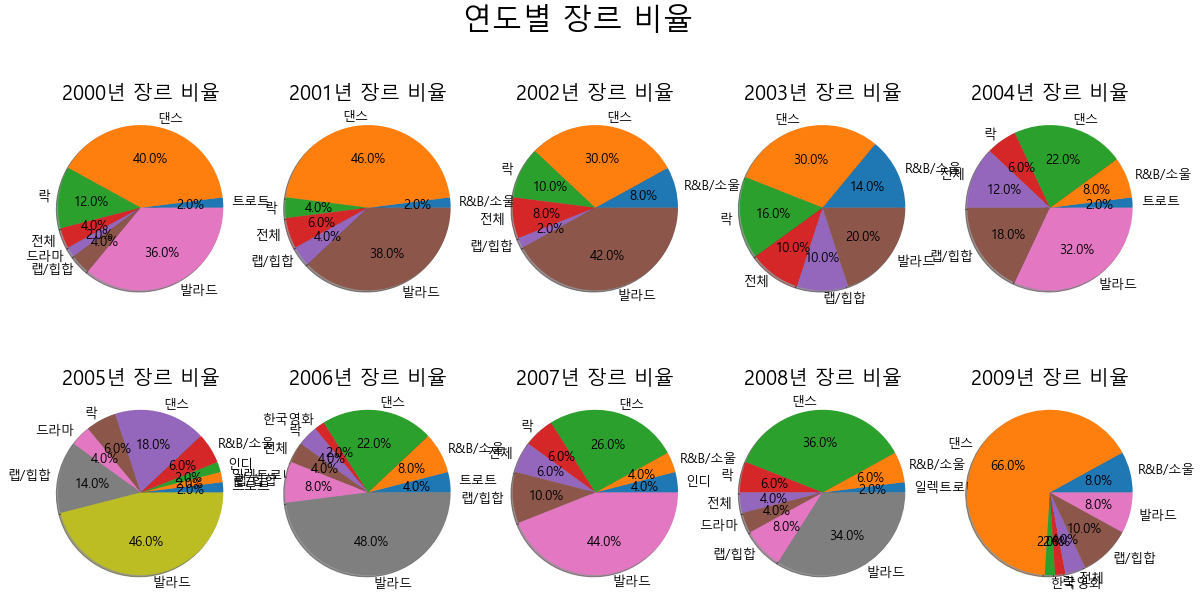

In [45]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
fig.suptitle('연도별 장르 비율', fontsize=30)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
n = 0
for a in genre_df_list:
    n += 1
    genre = a['장르'].apply(lambda x : x.split(' / '))
    genre_list = []
    for i in genre:
        #genre_list.append(i[0])
        genre_list.append(i[1])
    genre_list_count = []
    for j in set(genre_list):
#         print(f'{j} = {genre_list.count(j)}')
        genre_list_count.append(genre_list.count(j))
    
    
    plt.subplot(2,5,n)
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rc('font', size = 13) 
    plt.pie(genre_list_count, labels=set(genre_list), autopct='%.1f%%', shadow=True)
    
    plt.title(f'200{n-1}년 장르 비율', size = 20)
# fig.tight_layout()
plt.show()

In [123]:
df2000.set_index('가수명').groupby(['가수명']).count()['제목'].sort_values(ascending=False)

가수명
지오디 (god)             3
박혜경                   2
박효신                   2
핑클 (Fin.K.L)          2
조성모                   2
유승준                   1
윤종신                   1
이수영                   1
이적                    1
이정현                   1
임재범                   1
자우림                   1
정일영                   1
DJ DOC                1
제이 (J.ae)             1
왁스 (Wax)              1
조규만                   1
컨츄리 꼬꼬                1
코요태                   1
쿨 (COOL)              1
클론 (CLON)             1
태진아                   1
원타임 (1TYM)            1
신화                    1
H.O.T.                1
스페이스 A                1
S.E.S.                1
YB (윤도현 밴드)           1
김범수                   1
김장훈                   1
김현정                   1
디바 (Diva)             1
롤러코스터                 1
박기영                   1
박지윤                   1
박화요비                  1
백지영                   1
베이비복스 (Baby V.O.X)    1
보아 (BoA)              1
샤크라                   1
서태지                   1
성시경         

In [124]:
df2001.set_index('가수명').groupby(['가수명']).count()['제목'].sort_values(ascending=False)

가수명
김건모                   3
죠앤                    3
S.E.S.                2
샵 (S#arp)             2
유엔 (UN)               2
핑클 (Fin.K.L)          2
다나 (DANA)             2
왁스 (Wax)              2
쿨 (COOL)              2
코요태                   2
지오디 (god)             2
이지훈                   1
임창정                   1
자두                    1
차태현                   1
장나라                   1
이기찬                   1
클릭비 (Click-B)         1
포지션                   1
하늘                    1
이수영                   1
유승준                   1
윤미래                   1
강성훈                   1
싸이 (Psy)              1
성시경                   1
브라운 아이즈               1
보보                    1
베이비복스 (Baby V.O.X)    1
백지영                   1
박진영                   1
디바 (Diva)             1
드렁큰 타이거               1
김현정                   1
거북이                   1
강타 (KANGTA)           1
홍경민                   1
Name: 제목, dtype: int64

In [125]:
df.set_index('가수명').groupby(['가수명']).count()['제목'].sort_values(ascending=False)

가수명
지오디 (god)                   8
성시경                         8
이수영                         8
이승기                         8
보아 (BoA)                    7
                           ..
먼데이 키즈 (Monday Kiz)         1
명카드라이브 (박명수, 제시카, 이트라이브)    1
옥주현                         1
문희준                         1
서지영                         1
Name: 제목, Length: 214, dtype: int64

In [37]:
set(genre_list)

{'R&B/소울', '댄스', '락', '랩/힙합', '발라드', '전체', '한국영화'}

In [38]:
len(genre_list)

50

In [17]:
okt = Okt()

In [12]:
print(ENG_list)

[]


[('사랑', 150), ('그대', 78), ('우리', 47), ('다시', 45), ('나나', 43), ('이제', 41), ('눈물', 33), ('세상', 33), ('당신', 31), ('마음', 30), ('여자', 28), ('모두', 28), ('지금', 27), ('하나', 26), ('모습', 23), ('Down', 23), ('칭칭', 22), ('Bounce', 22), ('자꾸', 21), ('사람', 21), ('Up', 21), ('위해', 20), ('생각', 19), ('모든', 19), ('아무', 18), ('남자', 18), ('정말', 16), ('오늘', 16), ('기억', 15), ('언제', 15), ('하늘', 15), ('제발', 14), ('친구', 14), ('추억', 13), ('인생', 13)]


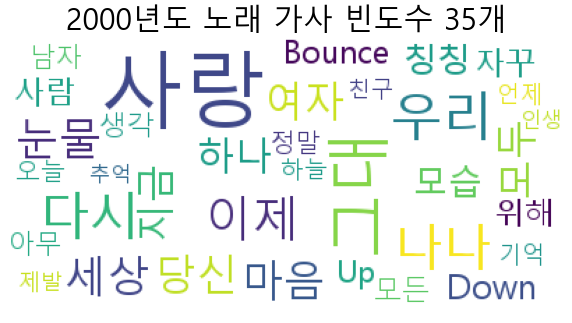

[('사랑', 161), ('그대', 91), ('다시', 54), ('눈물', 42), ('우리', 41), ('당신', 41), ('모습', 40), ('이제', 36), ('마음', 36), ('모두', 36), ('세상', 35), ('사람', 35), ('생각', 29), ('한번', 29), ('오오오', 26), ('후회', 21), ('위해', 20), ('하나', 19), ('지금', 19), ('모든', 19), ('다른', 17), ('바람', 17), ('시작', 16), ('추억', 16), ('항상', 16), ('정말', 16), ('얼마나', 14), ('시간', 14), ('제발', 14), ('가슴', 13), ('처음', 12), ('때문', 12), ('기억', 12), ('그녀', 12), ('이제야', 12)]


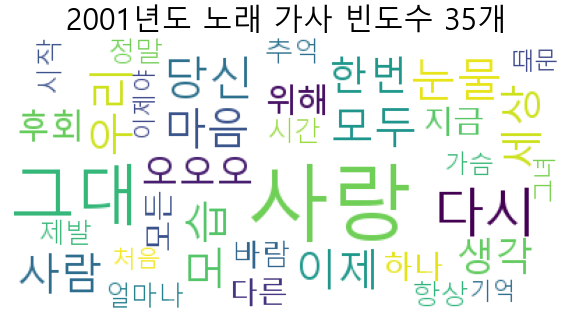

[('사랑', 131), ('그대', 109), ('사람', 43), ('눈물', 37), ('다시', 36), ('Yes', 32), ('이제', 28), ('챔피언', 28), ('오늘', 27), ('우리', 27), ('정말', 25), ('시간', 24), ('모습', 23), ('마음', 23), ('위해', 23), ('남자', 22), ('세상', 20), ('하루', 19), ('하나', 19), ('그녀', 19), ('조금', 18), ('생각', 18), ('그냥', 17), ('모두', 17), ('지금', 17), ('다른', 16), ('이별', 16), ('기억', 15), ('소리', 14), ('Yo', 14), ('가슴', 13), ('한번', 13), ('얘기', 13), ('추억', 12), ('여기', 12)]


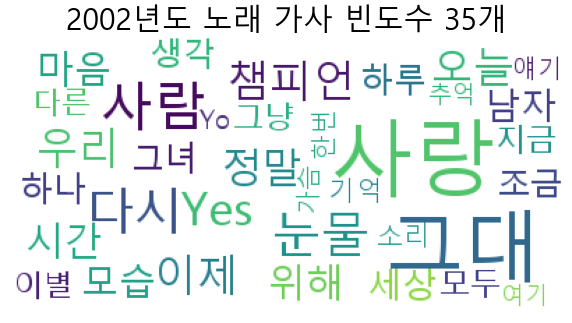

[('사랑', 161), ('그대', 64), ('이제', 48), ('사람', 41), ('눈물', 35), ('다시', 33), ('마음', 33), ('우리', 32), ('모두', 32), ('기억', 30), ('하늘', 28), ('때문', 25), ('생각', 24), ('모습', 22), ('위해', 22), ('정말', 21), ('세상', 21), ('순간', 20), ('머리', 20), ('하나', 19), ('시간', 17), ('지금', 17), ('모든', 17), ('수가', 17), ('조금', 17), ('누구', 17), ('다른', 16), ('한번', 16), ('난나', 16), ('Oh', 16), ('그녀', 15), ('가슴', 15), ('여자', 15), ('남자', 14), ('그게', 14)]


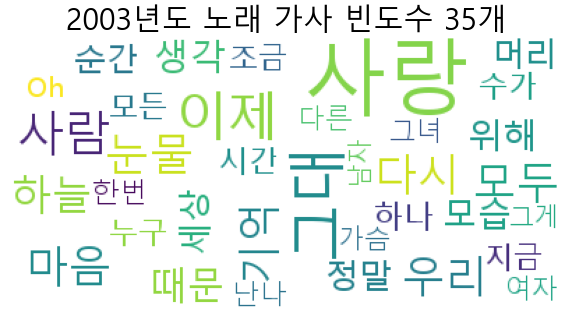

[('사랑', 142), ('Hot', 84), ('그대', 82), ('하늘', 49), ('가슴', 40), ('모두', 36), ('눈물', 36), ('오늘', 34), ('우리', 33), ('하나', 32), ('생각', 30), ('하루', 28), ('마음', 28), ('사람', 28), ('이제', 27), ('여자', 27), ('남자', 27), ('다시', 26), ('한번', 26), ('위해', 24), ('시간', 23), ('세상', 22), ('지금', 22), ('모습', 22), ('Girls', 20), ('이별', 19), ('모든', 19), ('추억', 18), ('행복', 16), ('인생', 16), ('오래오래', 16), ('기억', 15), ('후회', 15), ('바보', 14), ('그녀', 14)]


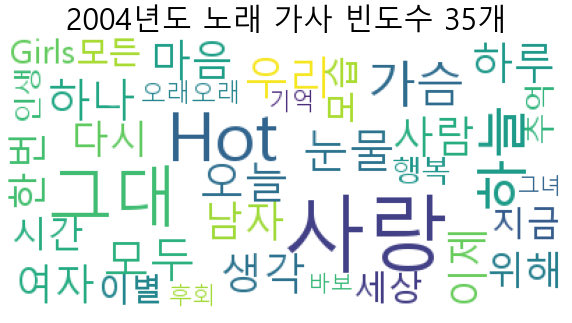

[('사랑', 147), ('사람', 49), ('나나', 45), ('세상', 35), ('마음', 34), ('다시', 34), ('그대', 34), ('눈물', 33), ('이제', 30), ('가슴', 29), ('모두', 28), ('Oh', 25), ('하늘', 23), ('오늘', 23), ('모습', 22), ('하나', 22), ('시간', 22), ('자꾸', 21), ('우리', 21), ('기억', 19), ('모든', 18), ('생각', 18), ('다른', 17), ('Go', 17), ('지금', 16), ('정말', 16), ('여자', 15), ('혼자', 14), ('아이', 14), ('내게로', 14), ('당신', 13), ('미소', 13), ('노래', 13), ('남자', 13), ('배치기', 13)]


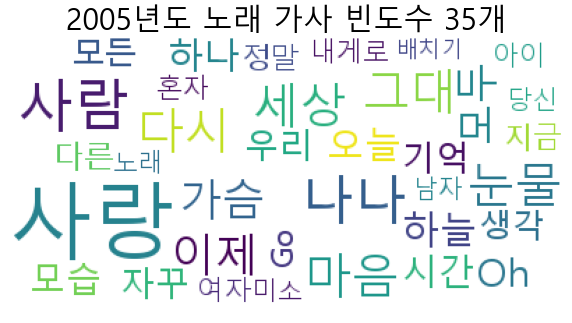

[('사랑', 178), ('그대', 74), ('다시', 45), ('눈물', 42), ('가슴', 41), ('하나', 37), ('세상', 36), ('사람', 33), ('우리', 32), ('여자', 28), ('마음', 27), ('남자', 27), ('오늘', 24), ('위해', 23), ('추억', 23), ('기억', 22), ('모두', 22), ('이제', 20), ('정말', 19), ('하루', 18), ('이따', 18), ('제발', 17), ('그녀', 17), ('슬픔', 17), ('때문', 16), ('보고', 16), ('처음', 16), ('심장', 15), ('거리', 15), ('생각', 15), ('하늘', 14), ('시간', 13), ('다른', 13), ('우린', 13), ('한번', 13)]


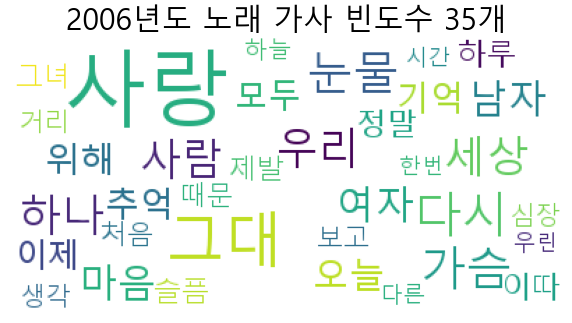

[('사랑', 185), ('그대', 117), ('사람', 76), ('가슴', 42), ('하늘', 41), ('눈물', 40), ('모두', 37), ('세상', 31), ('다시', 28), ('바보', 28), ('오늘', 26), ('기억', 25), ('이제', 25), ('마음', 25), ('정말', 23), ('모든', 23), ('하루', 21), ('추억', 21), ('고래', 21), ('시간', 20), ('생각', 19), ('우리', 19), ('안녕', 18), ('어디', 18), ('해도', 17), ('약속', 17), ('때문', 17), ('위로', 17), ('반복', 16), ('아무', 16), ('우린', 16), ('다른', 16), ('My', 16), ('입술', 15), ('하나', 15)]


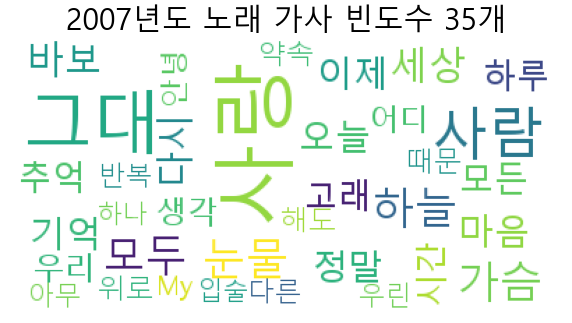

[('사랑', 142), ('그대', 98), ('가슴', 43), ('Girl', 41), ('사람', 37), ('우리', 37), ('눈물', 35), ('Ah', 33), ('정말', 31), ('Oh', 29), ('LaLaLa', 28), ('마음', 27), ('하나', 26), ('이제', 26), ('생각', 24), ('혼자', 24), ('아미', 24), ('Baby', 24), ('그녀', 23), ('다른', 22), ('순간', 22), ('모두', 20), ('Me', 19), ('Replay', 18), ('Love', 17), ('하루', 16), ('추억', 16), ('수가', 16), ('바보', 16), ('미소', 16), ('Sing', 16), ('자꾸', 15), ('다시', 15), ('이별', 15), ('가끔', 15)]


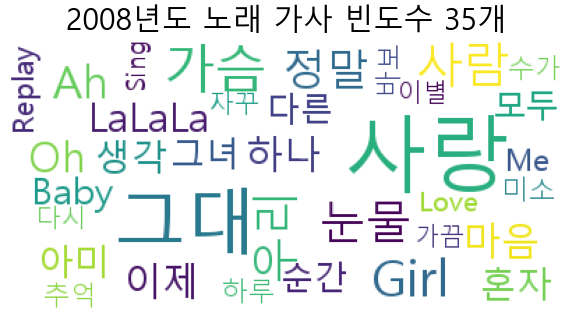

[('사랑', 208), ('Bo', 114), ('Peep', 110), ('Oh', 80), ('그대', 72), ('Mystery', 56), ('Lolli', 54), ('Gee', 52), ('가슴', 50), ('Baby', 50), ('la', 49), ('다시', 47), ('우리', 43), ('Yeah', 40), ('자꾸', 37), ('이제', 36), ('냉면', 36), ('정말', 35), ('No', 35), ('거짓말', 33), ('처음처럼', 33), ('때문', 32), ('나나', 31), ('Ah', 31), ('Hot', 31), ('Lollipop', 30), ('MUZIK', 30), ('하나', 29), ('Issue', 29), ('매일', 27), ('모두', 27), ('Let', 27), ('Honey', 27), ('생각', 26), ('오늘', 26)]


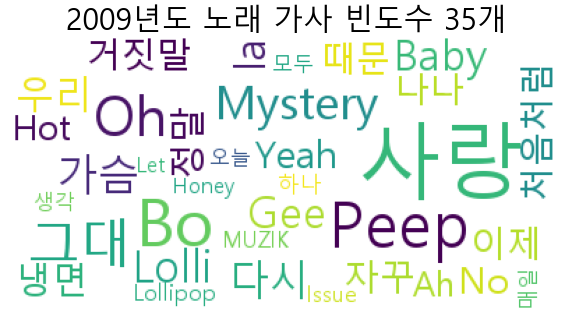

In [55]:
for i in range(0,10):
    noun_adj_list = []
    lyrics_str = str(lyrics_list[0+(i*50):50+(i*50)])
    lyrics_list1 = lyrics_list[0+(i*50):50+(i*50)]
    
    senTag = []
    result = []
    ENG_list = []
    for gasa in lyrics_list1:  # 50곡의 가사를 처음부터 한곡씩 꺼내어서 작업한다.
        
        sentences_tag = okt.pos(gasa) 
        gasa_ENG = re.sub('[^a-zA-Z]', ' ', gasa)
        
        for word, tag in sentences_tag:
            if tag in ['Noun']:
                if len(word) > 1:
                    result.append(word)
        tokenize = nltk.word_tokenize(gasa_ENG)
        tokenize2 = nltk.pos_tag(tokenize)
        for word, pos in tokenize2:
            if pos in ['NNP']:
                if len(word) > 1:
                    ENG_list.append(word)

#         ENG_list.append(word for (word, pos) in nltk.pos_tag(tokenize) if is_noun(pos(word))
                        
        # 특수문자 제거
#         special_chr = ["‘", "’", "!",  ",", ".", "(", ")", "?", "&", "'", "\”", "\"", "~"]
#         for char in special_chr:
#             gasa = gasa.replace( char, " " )

#         # 공백을 기준으로 문자열 나누기
#         get_rid_lst=['나', '너', '내','네', '난','넌', '날', '널', '넌', '젠','있다', '없다','하다']
#         temp = gasa.split( " " )    # 공백으로 나누기
#         for _str in temp:   # 반복문을 이용하여서 단어 하나씩 꺼내어 본다.
#             if _str != "":  # 공백("")이 아닐 경우에만 해당 조건문을 수행한다.
#                 if len(_str) > 1 and _str not in get_rid_lst:
#                     result.append( _str )    
        
    allresult = result + ENG_list    
    counts = Counter(allresult)
    tags = counts.most_common(35)
    print(tags)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    
    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(tags))
    # 생성된 WordCloud를 test.jpg로 보낸다.
    #cloud.to_file('test.jpg')
    plt.figure(figsize=(10, 8))
    plt.title(f'{2000+i}년도 노래 가사 빈도수 35개', fontsize = 30)
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

# <span style='color:Blue'> 최종 결론   </span>
- 가사의 빈도수를 통해 시대의 대표곡 확인
- 댄스/발라드 장르 주를 이뤘으며 미디엄 템포 발라드 >> 댄스 흐름
-  영어 가사 점점 증가
-  07년 부터 아이돌 최전성기 시작 >> 10년도 이후에도 같은 현상 지속될지

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ss\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True